In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

from homography import Homography

np.set_printoptions(suppress=True)

%matplotlib inline

Original arrangement:  ['data/img4.jpg', 'data/img3.jpg', 'data/.ipynb_checkpoints', 'data/img2.jpg', 'data/img1.jpg']
Sorted arrangement:  ['data/img1.jpg', 'data/img2.jpg', 'data/.ipynb_checkpoints', 'data/img3.jpg', 'data/img4.jpg']

Img shape: (664 x 1000)


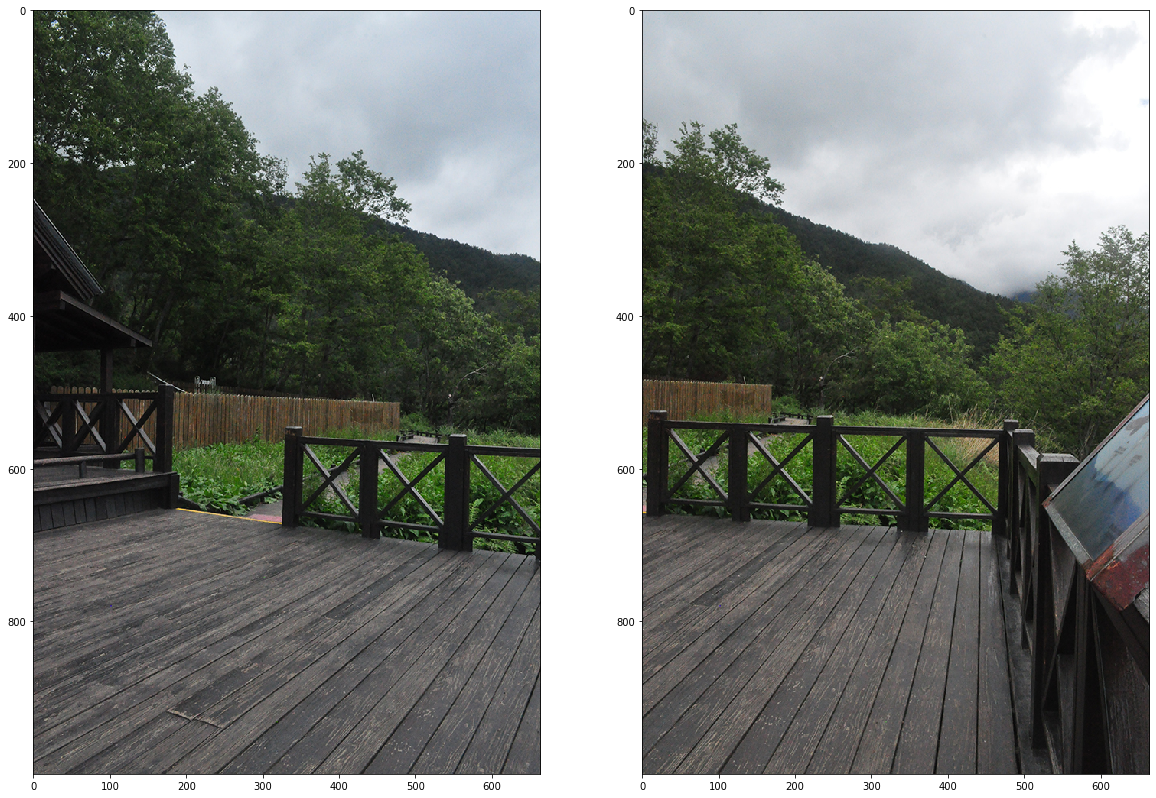

In [2]:
root = 'data'
files = []
for filename in os.listdir(root):
    files.append(os.path.join(root, filename))

print('Original arrangement: ', files)
# sort them in reverse
files = files[::-1]
print('Sorted arrangement: ', files)

frames = []
for idx in range(len(files)):
    if not files[idx].endswith('jpg'):
        continue
    frames.append(cv2.cvtColor(cv2.imread(files[idx], cv2.IMREAD_ANYCOLOR), cv2.COLOR_BGR2RGB).astype(np.uint8))
    
IMG_W = frames[0].shape[1]; IMG_H = frames[0].shape[0]
print(f'\nImg shape: ({IMG_W} x {IMG_H})')

N = len(frames[:2])
fig, axes = plt.subplots(1, N, figsize=(20, 20))
for idx in range(N):
    axes[idx].imshow(frames[idx])

0 => 155.44410705566406 x 511.2642517089844 - 221.92166137695312 x 563.4420166015625
20 => 368.9945373535156 x 770.0038452148438 - 52.92271423339844 x 755.09765625
40 => 386.20220947265625 x 616.8251342773438 - 70.5380859375 x 597.1165771484375
60 => 405.3084716796875 x 642.8820190429688 - 91.14319610595703 x 623.12939453125
80 => 418.92266845703125 x 188.53399658203125 - 110.33375549316406 x 152.22998046875
100 => 447.4696044921875 x 254.43389892578125 - 139.29713439941406 x 226.12969970703125
120 => 461.01727294921875 x 676.5960693359375 - 149.20693969726562 x 653.4712524414062
140 => 474.85552978515625 x 732.8678588867188 - 162.477294921875 x 707.9158935546875
160 => 484.21807861328125 x 594.9885864257812 - 172.10804748535156 x 571.8283081054688
180 => 494.9939880371094 x 550.9956665039062 - 185.31976318359375 x 527.8895263671875
200 => 518.5101928710938 x 671.531982421875 - 206.00457763671875 x 644.6467895507812
220 => 530.1573486328125 x 647.71826171875 - 217.0149383544922 x 621.3

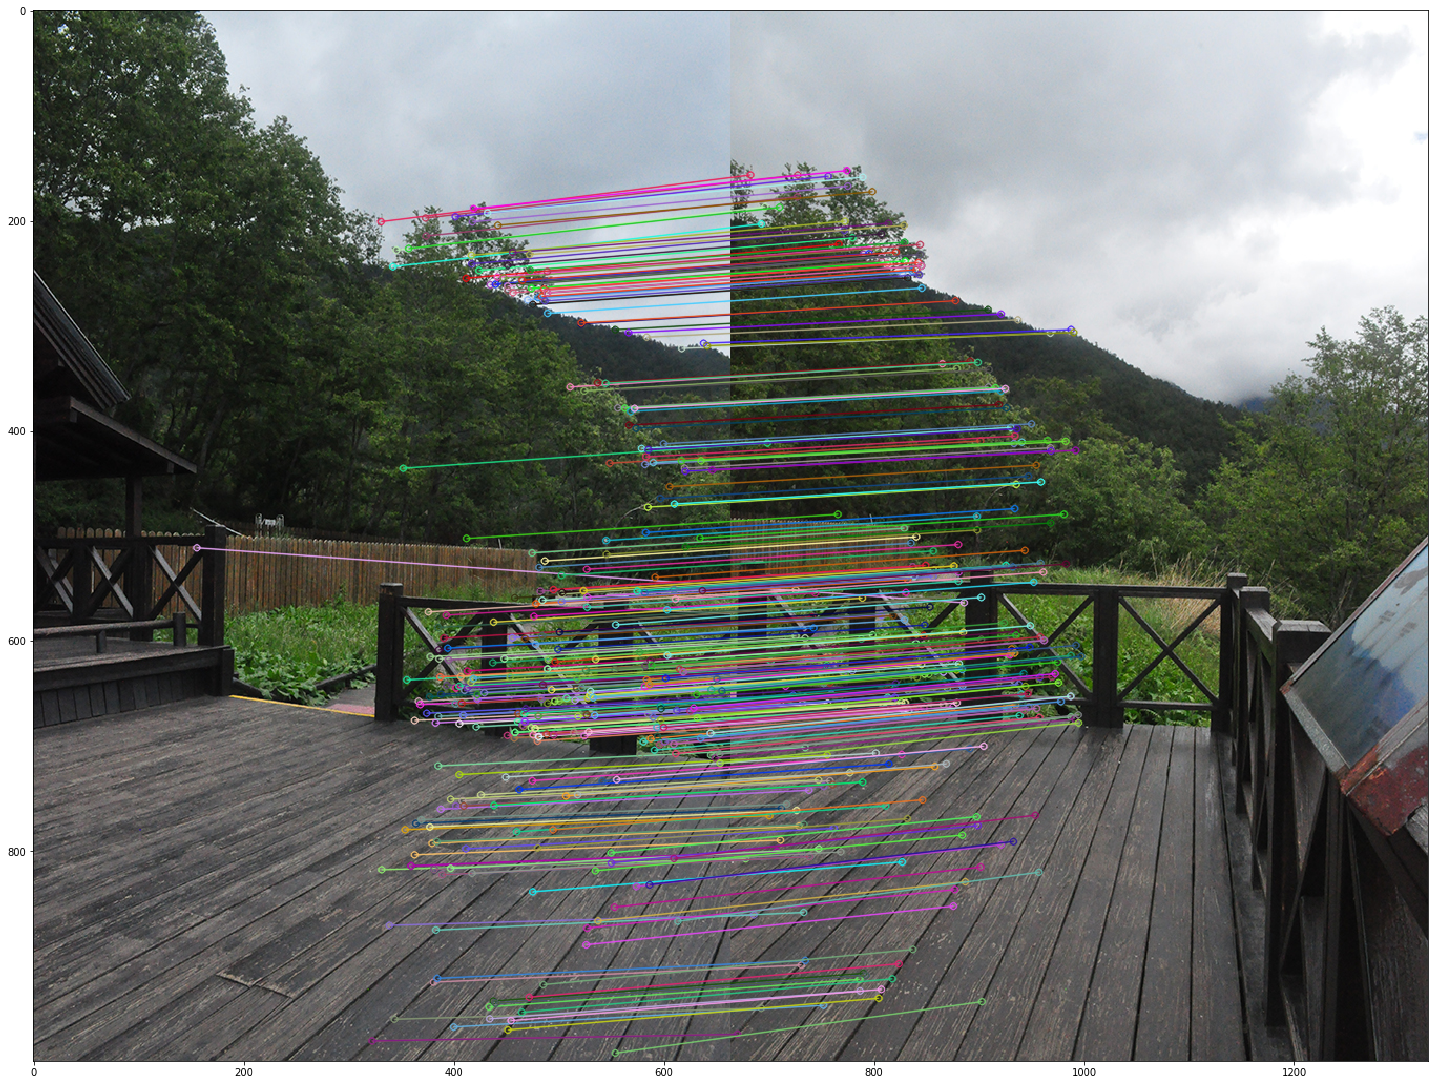

In [3]:
config = {
    'keypoints' : 'sift',
    'distance_threshold' : 0.6,
    'probability_of_outliers' : 0.2,
    'number_of_keypoints_per_sample' : 4, # min required to solve the linear system
    'probability_of_only_inliers' : 0.99,
    'distance_eps' : 3, # pixels,
    'render' : True
}

homography = Homography(config)

correspondances = homography.compute_correspondances_with_sift(frames[0], frames[1])

H = homography.compute_homography_with_ransac(correspondances)

print(f'\n\nhomography:\n{H}\n')

In [4]:
# Note: Compute camera pose from homography
R, t = homography.estimate_camera_position(H)
print(R)
print(t)

[[-0.97909166 -0.20341847 -0.00066366]
 [-0.0121787  -0.98001861 -0.00025615]
 [-0.00059829 -0.00024271  0.95705068]]
[323.05101503 158.37240401  -0.41878579]


In [5]:
# Note: Compute Euler angles (2 pairs)
angles1, angles2 = homography.compute_euler_angles(R)
print(angles1.to_degrees().angles)
print(angles2.to_degrees().angles)

[-179.28734758852846, 0.034279396300995475, -0.014530534431887383]
[0.7126524114715622, 179.965720603699, 179.9854694655681]
